In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from itertools import combinations
import numpy as np
df=pd.read_csv("C:\\dataMining\\7.8_State_wise_Rates_of_Accidents_by_Class_of_Motor_Vehicles_on_Road_1970_per_1000_vehicles.csv")
#Replacing all non numerical symbols(garbage) to null value (Data Cleaning)
df=df.replace(to_replace ="@",value ="NaN")
df=df.replace(to_replace ="*",value ="NaN")
#Dropping rows and colums which are having excess NA values (Data Reduction)
df=df.dropna(thresh=len(df)-5,axis=1)
df=df.dropna(axis=0, how='any', thresh=9, subset=None, inplace=False)
#Filling NA values with mean
df=df.fillna(df.mean(),inplace=False)
df

,Category (Col. 1),State/ Union Territory (Col. 2),All types of vehicles (Col. 3),Motor Cycles (Col. 4),Jeeps (Col. 6),Motor Cars (Col. 7),Motor Cabs (Col. 8),Buses (Col. 9),Goods Vehicles (Col. 10),Misc. vehicles (Col. 11)
0,State,Andhra Pradesh,31.35,7.52,32.65000,16.45,75.500,95.00,63.30,28.82
1,State,Assam,24.90,11.65,23.40000,16.30,145.700,64.00,18.21,22.00
2,State,Bihar,54.50,12.50,60.00000,33.05,157.500,87.00,81.00,121.00
3,State,Gujarat,30.40,7.66,23.95000,16.70,113.500,99.25,53.75,27.05
4,State,Himachal Pradesh,60.30,11.14,66.25000,104.50,149.945,112.00,17.62,64.30
5,State,Jammu & Kashmir,50.90,11.21,75.40000,27.00,193.000,97.00,50.60,57.90
6,State,Kerala,54.30,19.90,112.50000,24.05,77.000,146.00,55.00,84.02
7,State,Maharashtra,130.01,33.25,87.45000,138.31,352.520,404.19,127.02,164.50
8,State,Mysore,52.94,19.36,42.19000,43.65,112.650,109.53,93.97,56.29
10,State,Orissa,69.70,24.88,60.86000,52.87,139.170,153.85,93.98,66.69


In [2]:
df2=df['All types of vehicles (Col. 3)']
df2

0      31.35
1      24.90
2      54.50
3      30.40
4      60.30
5      50.90
6      54.30
7     130.01
8      52.94
10     69.70
11     22.03
12    105.70
13     39.35
14     51.20
16     80.40
17     48.70
18     52.00
19     47.90
Name: All types of vehicles (Col. 3), dtype: float64

In [3]:
#Creating new dataframe to show the bar graph for the sake of visualization

In [4]:
df1=df
del df1['All types of vehicles (Col. 3)']
df1

,Category (Col. 1),State/ Union Territory (Col. 2),Motor Cycles (Col. 4),Jeeps (Col. 6),Motor Cars (Col. 7),Motor Cabs (Col. 8),Buses (Col. 9),Goods Vehicles (Col. 10),Misc. vehicles (Col. 11)
0,State,Andhra Pradesh,7.52,32.65000,16.45,75.500,95.00,63.30,28.82
1,State,Assam,11.65,23.40000,16.30,145.700,64.00,18.21,22.00
2,State,Bihar,12.50,60.00000,33.05,157.500,87.00,81.00,121.00
3,State,Gujarat,7.66,23.95000,16.70,113.500,99.25,53.75,27.05
4,State,Himachal Pradesh,11.14,66.25000,104.50,149.945,112.00,17.62,64.30
5,State,Jammu & Kashmir,11.21,75.40000,27.00,193.000,97.00,50.60,57.90
6,State,Kerala,19.90,112.50000,24.05,77.000,146.00,55.00,84.02
7,State,Maharashtra,33.25,87.45000,138.31,352.520,404.19,127.02,164.50
8,State,Mysore,19.36,42.19000,43.65,112.650,109.53,93.97,56.29
10,State,Orissa,24.88,60.86000,52.87,139.170,153.85,93.98,66.69


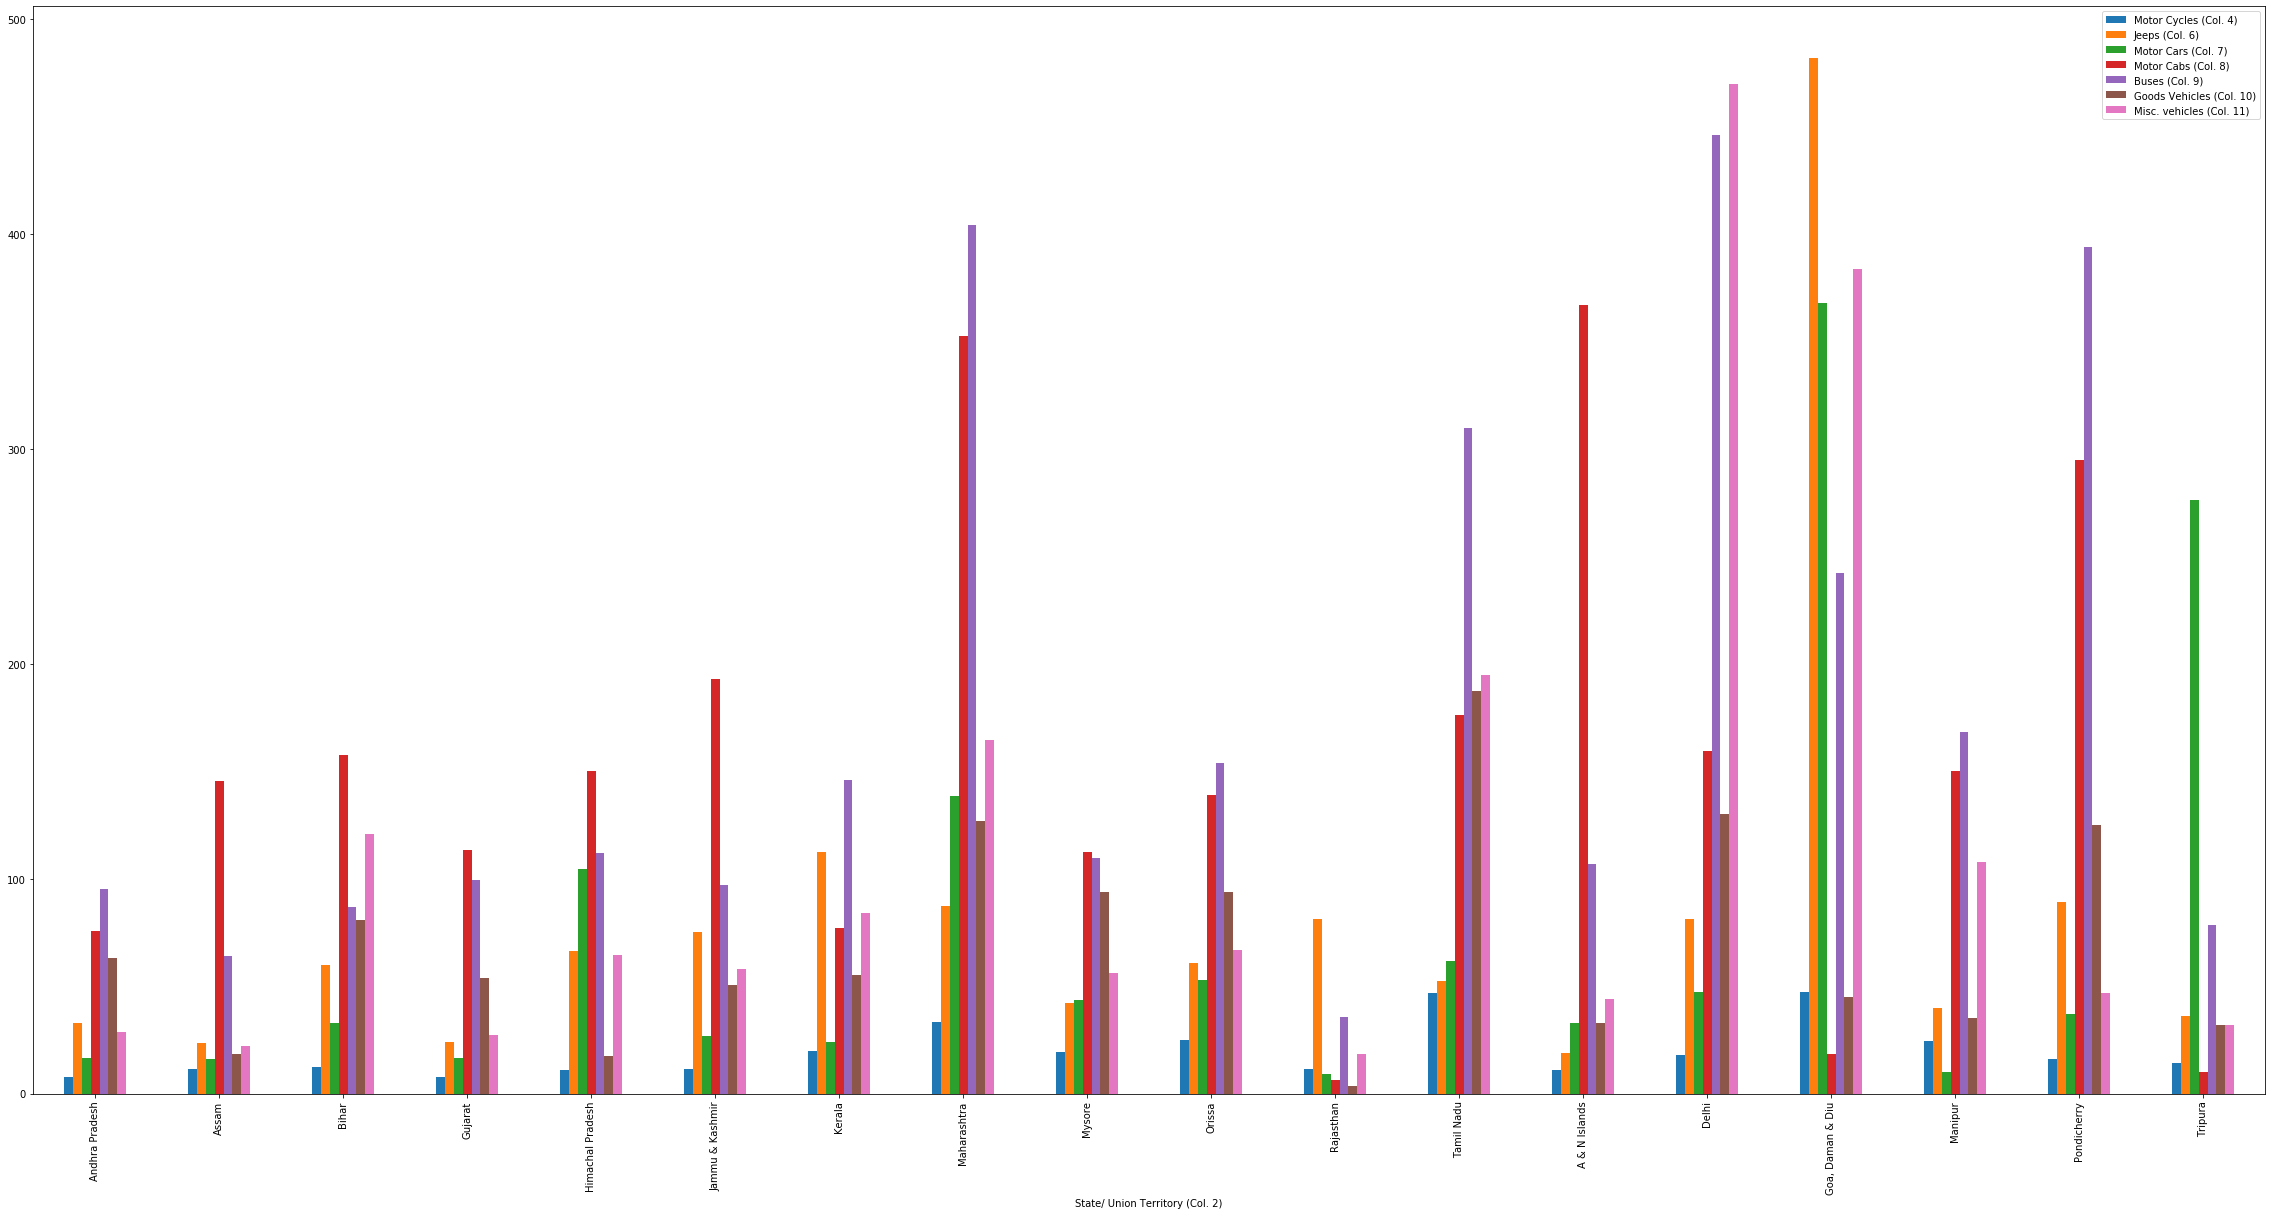

In [5]:
df1.set_index("State/ Union Territory (Col. 2)",inplace=True)
import matplotlib.pyplot as plt
df1.plot.bar(stacked=False,figsize=(40,20))
plt.show()

In [6]:
# K-Means clustering starts:
#stroring total accidents of each state
x=[]
for i in range(0,len(df2)):
    x.append(df2.iloc[i])

In [7]:
#storing indices for making combinations
ind=[]
for i in range(0,len(df2)):
    ind.append(i)
len(df2)

18

In [8]:
#calculating minimum sse for each number of clusters
elb=[]
numclus=[]
for numofclus in range(1,8):
    comb=sum([list(map(list, combinations(ind, i))) for i in range(numofclus,numofclus+1)], [])
    minsse=1000000000000
    for j in range(1,len(comb)):
        cenx=[]
        for k in range(0,len(comb[j])):
            cenx.append(x[comb[j][k]])
        totsse=0
        for k in range(0,len(x)):
            mindis=1000000000000
            for l in range(0,len(cenx)):
                dis=(x[k]-cenx[l])*(x[k]-cenx[l])
                if dis<mindis:
                    mindis=dis
            totsse = totsse + mindis
        if totsse<minsse:
            minsse=totsse
    elb.append(minsse)
    numclus.append(numofclus)
elb

[12645.179599999996,
 3858.839599999999,
 1786.207599999999,
 996.6827999999994,
 405.70669999999996,
 291.2166999999999,
 183.0441999999999]

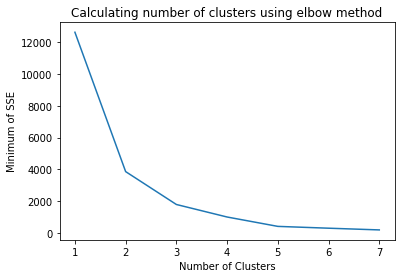

In [9]:
#plotting it in order to calculate the optimum number of clusters via elbow method

plt.plot(numclus, elb) 
  
# naming the x axis 
plt.xlabel('Number of Clusters') 
# naming the y axis 
plt.ylabel('Minimum of SSE') 
  
# giving a title to my graph 
plt.title('Calculating number of clusters using elbow method') 
  
# function to show the plot 
plt.show()

In [10]:
#calculating the clusters with minimum sse for given number of clusters
minnsse=10000000000000
color1=[]
color2=[]
for i in range(0,len(x)):
    color1.append(-1)
    color2.append(-1)
#generating all possible combinations
comb1=sum([list(map(list, combinations(ind, i))) for i in range(3,4)], [])
for rep in range(0,len(comb1)):
    cenx=[]
    #appending corresponding points to indices
    for i in range(0,len(comb1[rep])):
        cenx.append(x[comb1[rep][i]])
    #performing k-means clustering
    for i in range(0,100):
        sse=0
        for j in range(0,len(x)):
            minn=10000000000000
            minin=-1
            for k in range(0,3):
                if((x[j]-cenx[k])*(x[j]-cenx[k])<minn):
                    minn=(x[j]-cenx[k])*(x[j]-cenx[k])
                    minin=k
            color2[j]=minin
            sse=sse+minn
        if(sse<minnsse):
            minnsse=sse
            for j in range(0,len(x)):
                #updating the color in case sse is less
                color1[j]=color2[j]
        for j in range(0,3):
            #calculating new centroids for each cluster
            newx=0
            xno=0
            for k in range(0,len(x)):
                if(color2[k]==j):
                    newx=newx+x[k]
                    xno=xno+1
            cenx[j]=newx/xno
color1

[1, 1, 0, 1, 0, 0, 0, 2, 0, 0, 1, 2, 1, 0, 0, 0, 0, 0]

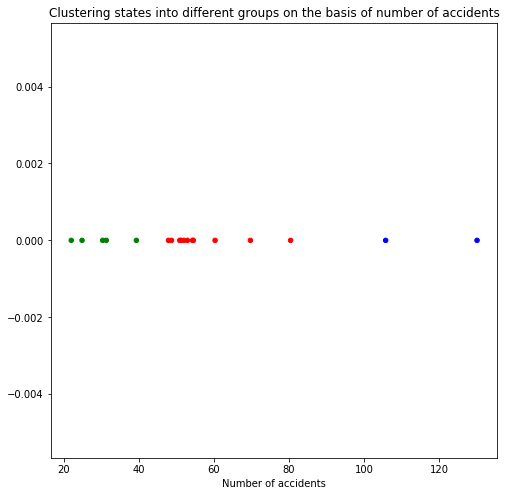

In [11]:
#poltting the obtained clusters on graph
y=[]
for i in range(0,len(x)):
    y.append(0)
a=np.array([x,y])
categories=np.array(color1)
colormap=np.array(['r','g','b'])
plt.rcParams["figure.figsize"] = (8, 8)
plt.scatter(a[0], a[1], s=20, c=colormap[categories])
plt.xlabel('Number of accidents')
plt.title('Clustering states into different groups on the basis of number of accidents')
plt.savefig('ScatterClassPlot.png')
plt.show()